# Analysis for salmon trap data in the Dungenesss River from 2007
### Description of data:
Data is stored in MS Excel files with one sheet per year. For 2007, the counts for wild and hatchery fish are separate.


In [323]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
import io
import datetime

In [324]:
year = "2007"
# #read file in Windows
try:
    df_year = pd.read_excel(
   io="C:/Users/maria/OneDrive/Documents/data/pied_piper/Dungeness smolt trap 2005 - 2014.xlsx",
   sheet_name =year,
    header = [3,4,5]
)
except PermissionError:
    print("Permission Error. Close the file, if it is open.")
    

df_year.head()
columns = list(df_year)


# df_year.columns  = ['_'.join(col) for col in df_year.columns.values]
# df_year.columns.map('_'.join).str.strip('_')
list_names = []
for col in df_year.columns.values:
    list_names.append(str(col[0]) + '_' + str(col[1]) + '_' + str(col[2]))


df_year.columns = list_names


df_year = df_year.rename(columns={'DATE and TIMES_Unnamed: 0_level_1_Down': "Date",
                        'DATE and TIMES_Unnamed: 1_level_1_Down': "Down_time",
                        'DATE and TIMES_Unnamed: 2_level_1_Up': "Up_date",
                        'DATE and TIMES_Unnamed: 3_level_1_Up': "Up_time",
                        'Hour Fished_Unnamed: 4_level_1_IN': "In",
                        'Hour Fished_Unnamed: 5_level_1_OUT': "Out"})
df_year = df_year.iloc[:-1]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year)

,Date,Down_time,Up_date,Up_time,In,Out,Chinook 0+_Total_10,Chinook 0+_Hatchery_10\30,Chinook 0+_Wild_10\00,Chinook 1+_Total_11,Chinook 1+_Hatchery_11\30,Chinook 1+_Wild_11\00,Coho 1+_Total_41,Coho 1+_Wild_41\08,Coho 1+_Wild_41\00,Coho 1+_Hatchery_41\13,Steelhead 1+ Smolts_Total_71,Steelhead 1+ Smolts_Wild_71\08,Steelhead 1+ Smolts_Wild_71\09,Steelhead 1+ Smolts_Wild_71\00,Steelhead 1+ Smolts_Hatchery_71\13,Miscellaneous Salmon Fry_Wild_Coho0,Miscellaneous Salmon Fry_Wild_Chum,Miscellaneous Salmon Fry_Wild_Pink,Miscellaneous Salmon Fry_Wild_Sockeye,Trout Parr_Wild_Total,Trout Parr_Wild_Steelhead,Trout Parr_Wild_Cutthroat,Cutthroat_Wild_Smolt,Cutthroat_Wild_Adult,Dolly\Bull_Wild_Smolt
0,2007-02-21,10:42:00,2007-02-21,17:30:00,6.800000,0.000000,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
1,2007-02-21,17:30:00,2007-02-22,07:30:00,14.000000,0.000000,5.0,NaN,5.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,2.0,2.0,NaN,0.0,NaN,NaN
2,2007-02-22,07:30:00,2007-02-22,18:34:00,11.066667,0.000000,1.0,NaN,1.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
3,2007-02-22,18:34:00,2007-02-23,08:20:00,13.766667,0.000000,1.0,NaN,1.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN
4,2007-02-23,08:20:00,2007-02-23,18:52:00,10.533333,0.000000,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
5,2007-02-23,18:52:00,2007-02-24,07:02:00,12.166667,0.000000,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,3.0,NaN,NaN,0.0,NaN,NaN
6,2007-02-24,07:02:00,2007-02-24,18:30:00,11.466667,0.000000,1.0,NaN,1.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
7,2007-02-24,18:30:00,2007-02-25,07:06:00,12.600000,0.000000,2.0,NaN,2.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN
8,2007-02-25,07:06:00,2007-02-25,17:16:00,10.166667,0.000000,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
9,2007-02-25,17:16:00,2007-02-26,07:32:00,14.266667,0.000000,3.0,NaN,3.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN


In [325]:
df_year['Up'] = df_year['Up_date'] + pd.to_timedelta(df_year["Up_time"].astype(str))
df_year['Down'] = df_year['Date'] + pd.to_timedelta(df_year["Down_time"].astype(str))
df_year['midpoint'] = df_year['Down'] + (df_year['Up'] - df_year['Down'])/2
#getting temperature data
#reading html data
year = '2007'
url = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year + "_WTM_FM.TXT"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

url_flow = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year+ "_DSG_FM.TXT"
html_flow = urlopen(url_flow).read()
soup_flow = BeautifulSoup(html_flow, features="html.parser")

# kill all script and style elements
for script in soup_flow(["script", "style"]):
    script.extract()    # rip it out


text_flow = soup_flow.get_text()
text = text[521:-52]
text_flow = text_flow[509:-129]

df = pd.read_csv(io.StringIO(text), sep='\s+', header = None, names = ["date", "time", "temp", "quality"])

df = df.iloc[:-2] #removing last two rows that do not contain data
df['midpoint'] =  pd.to_datetime(df['date'] + ' ' + df['time'])

df_year_temp = pd.merge_asof(df_year.dropna(subset = ['midpoint']),df, on="midpoint",tolerance=pd.Timedelta(minutes = 15))
# print(df_year_temp)
df_flow = pd.read_csv(io.StringIO(text_flow), sep='\s+', header = None, names = ["date", "time", "flow", "quality"])

df_flow['midpoint'] =  pd.to_datetime(df_flow['date'] + ' ' + df_flow['time'])

df_year_temp_flow = pd.merge_asof(
    df_year_temp.dropna(subset = ['midpoint']),df_flow, on="midpoint",tolerance=pd.Timedelta(minutes = 15))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year_temp_flow)

,Date,Down_time,Up_date,Up_time,In,Out,Chinook 0+_Total_10,Chinook 0+_Hatchery_10\30,Chinook 0+_Wild_10\00,Chinook 1+_Total_11,Chinook 1+_Hatchery_11\30,Chinook 1+_Wild_11\00,Coho 1+_Total_41,Coho 1+_Wild_41\08,Coho 1+_Wild_41\00,Coho 1+_Hatchery_41\13,Steelhead 1+ Smolts_Total_71,Steelhead 1+ Smolts_Wild_71\08,Steelhead 1+ Smolts_Wild_71\09,Steelhead 1+ Smolts_Wild_71\00,Steelhead 1+ Smolts_Hatchery_71\13,Miscellaneous Salmon Fry_Wild_Coho0,Miscellaneous Salmon Fry_Wild_Chum,Miscellaneous Salmon Fry_Wild_Pink,Miscellaneous Salmon Fry_Wild_Sockeye,Trout Parr_Wild_Total,Trout Parr_Wild_Steelhead,Trout Parr_Wild_Cutthroat,Cutthroat_Wild_Smolt,Cutthroat_Wild_Adult,Dolly\Bull_Wild_Smolt,Up,Down,midpoint,date_x,time_x,temp,quality_x,date_y,time_y,flow,quality_y
0,2007-02-21,10:42:00,2007-02-21,17:30:00,6.800000,0.000000,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,2007-02-21 17:30:00,2007-02-21 10:42:00,2007-02-21 14:06:00,02/21/2007,14:00,5.1,140,02/21/2007,14:00,318.0,1
1,2007-02-21,17:30:00,2007-02-22,07:30:00,14.000000,0.000000,5.0,NaN,5.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,2.0,2.0,NaN,0.0,NaN,NaN,2007-02-22 07:30:00,2007-02-21 17:30:00,2007-02-22 00:30:00,02/22/2007,00:30,3.8,140,02/22/2007,00:30,319.0,1
2,2007-02-22,07:30:00,2007-02-22,18:34:00,11.066667,0.000000,1.0,NaN,1.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,2007-02-22 18:34:00,2007-02-22 07:30:00,2007-02-22 13:02:00,02/22/2007,13:00,4.5,140,02/22/2007,13:00,314.0,1
3,2007-02-22,18:34:00,2007-02-23,08:20:00,13.766667,0.000000,1.0,NaN,1.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,2007-02-23 08:20:00,2007-02-22 18:34:00,2007-02-23 01:27:00,02/23/2007,01:15,3.2,140,02/23/2007,01:15,312.0,1
4,2007-02-23,08:20:00,2007-02-23,18:52:00,10.533333,0.000000,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,2007-02-23 18:52:00,2007-02-23 08:20:00,2007-02-23 13:36:00,02/23/2007,13:30,4.1,140,02/23/2007,13:30,307.0,1
5,2007-02-23,18:52:00,2007-02-24,07:02:00,12.166667,0.000000,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,3.0,NaN,NaN,0.0,NaN,NaN,2007-02-24 07:02:00,2007-02-23 18:52:00,2007-02-24 00:57:00,02/24/2007,00:45,3.3,140,02/24/2007,00:45,305.0,1
6,2007-02-24,07:02:00,2007-02-24,18:30:00,11.466667,0.000000,1.0,NaN,1.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,2007-02-24 18:30:00,2007-02-24 07:02:00,2007-02-24 12:46:00,02/24/2007,12:45,3.9,140,02/24/2007,12:45,300.0,1
7,2007-02-24,18:30:00,2007-02-25,07:06:00,12.600000,0.000000,2.0,NaN,2.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,2007-02-25 07:06:00,2007-02-24 18:30:00,2007-02-25 00:48:00,02/25/2007,00:45,3.7,140,02/25/2007,00:45,298.0,1
8,2007-02-25,07:06:00,2007-02-25,17:16:00,10.166667,0.000000,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,2007-02-25 17:16:00,2007-02-25 07:06:00,2007-02-25 12:11:00,02/25/2007,12:00,4.3,140,02/25/2007,12:00,296.0,1
9,2007-02-25,17:16:00,2007-02-26,07:32:00,14.266667,0.000000,3.0,NaN,3.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,2007-02-26 07:32:00,2007-02-25 17:16:00,2007-02-26 00:24:00,02/26/2007,00:15,3.8,140,02/26/2007,00:15,289.0,1


In [326]:
df_year_temp_flow = df_year_temp_flow.rename(columns={'Chinook 0+_Total_10':'Chinook0_Total',
                                       "Chinook 0+_Hatchery_10\\30":'Chinook0_Hat',
                                       'Chinook 0+_Wild_10\\00':'Chinook0_Wild',                            
                                       'Chinook 1+_Total_11':'Chinook1_Total',
                                       'Chinook 1+_Hatchery_11\\30':'Chinook1_Hat',
                                       'Chinook 1+_Wild_11\\00':'Chinook1_Wild',  
                                       'Coho 1+_Total_41':'Coho1_Total',
                                       'Coho 1+_Wild_41\\08':'Coho1_Wild',
                                       'Coho 1+_Wild_41\\00':'Coho1_Wild2',
                                       'Coho 1+_Hatchery_41\\13':'Coho1_Hat', 
                                       'Miscellaneous Salmon Fry_Wild_Coho0':'Coho0',
                                       'Miscellaneous Salmon Fry_Wild_Chum':'Chum',
                                       'Miscellaneous Salmon Fry_Wild_Pink':'Pink',
                                       'Miscellaneous Salmon Fry_Wild_Sockeye':'Sockeye', 
                                       'Steelhead 1+ Smolts_Total_71':'Steelhead1_Total',
                                       'Steelhead 1+ Smolts_Wild_71\\08':'Steelhead1_Wild',
                                       'Steelhead 1+ Smolts_Wild_71\\09':'Steelhead1_Wild1',
                                       'Steelhead 1+ Smolts_Wild_71\\00':'Steelhead1_Wild2',
                                       'Steelhead 1+ Smolts_Hatchery_71\\13':'Steelhead1_Hat'})

#aggregating the data
groupedby_dates_year = df_year_temp_flow.groupby(by=["Date"]).agg({'In':'sum',
                                       'Out':'sum',
                                       'Chinook0_Total':'sum',
                                       'Chinook0_Hat':'sum',
                                       'Chinook0_Wild':'sum',                            
                                       'Chinook1_Total':'sum',
                                       'Chinook1_Hat':'sum',
                                       'Chinook1_Wild':'sum',  
                                       'Coho1_Total':'sum',
                                       'Coho1_Wild':'sum',
                                       'Coho1_Wild2':'sum',
                                       'Coho1_Hat':'sum', 
                                       'Coho0':'sum',
                                       'Chum':'sum',
                                       'Pink':'sum',
                                       'Sockeye':'sum', 
                                       'Steelhead1_Total':'sum',
                                       'Steelhead1_Wild':'sum',
                                       'Steelhead1_Wild1':'sum',
                                       'Steelhead1_Wild2':'sum',
                                       'Steelhead1_Hat':'sum',
                                       'Cutthroat_Wild_Smolt':'sum',
                                       'Cutthroat_Wild_Adult':'sum',
                                       'Dolly\Bull_Wild_Smolt':'sum',  
                                       'Trout Parr_Wild_Total':'sum',
                                       'Trout Parr_Wild_Steelhead':'sum',
                                       'Trout Parr_Wild_Cutthroat':'sum',                            
                                       'temp':'mean',
                                       'flow':'mean'})
groupedby_dates_year = groupedby_dates_year[groupedby_dates_year['Out'] == 0]
groupedby_dates_year.fillna(0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_dates_year)

,In,Out,Chinook0_Total,Chinook0_Hat,Chinook0_Wild,Chinook1_Total,Chinook1_Hat,Chinook1_Wild,Coho1_Total,Coho1_Wild,Coho1_Wild2,Coho1_Hat,Coho0,Chum,Pink,Sockeye,Steelhead1_Total,Steelhead1_Wild,Steelhead1_Wild1,Steelhead1_Wild2,Steelhead1_Hat,Cutthroat_Wild_Smolt,Cutthroat_Wild_Adult,Dolly\Bull_Wild_Smolt,Trout Parr_Wild_Total,Trout Parr_Wild_Steelhead,Trout Parr_Wild_Cutthroat,temp,flow
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-02-21,20.800000,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,4.450000,318.500000
2007-02-22,24.833333,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.850000,313.000000
2007-02-23,22.700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.700000,306.000000
2007-02-24,24.066667,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.800000,299.000000
2007-02-25,24.433333,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.050000,292.500000
2007-02-26,23.750000,0.0,14.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,3.800000,278.500000
2007-02-27,24.550000,0.0,5.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.500000,267.000000
2007-02-28,23.900000,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,3.250000,257.000000
2007-03-01,23.516667,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.900000,243.500000


In [327]:
#calculate fish per hour

#chinook 0
groupedby_dates_year['chinook0_perhour'] = groupedby_dates_year['Chinook0_Total']/groupedby_dates_year['In']
groupedby_dates_year['chinook0_hatchery_perhour'] = groupedby_dates_year['Chinook0_Hat']/groupedby_dates_year['In']
groupedby_dates_year['chinook0_wild_perhour'] = groupedby_dates_year['Chinook0_Wild']/groupedby_dates_year['In']

#chinook 1
groupedby_dates_year['chinook1_perhour'] = groupedby_dates_year['Chinook1_Total']/groupedby_dates_year['In']
groupedby_dates_year['chinook1_hatchery_perhour'] = groupedby_dates_year['Chinook1_Hat']/groupedby_dates_year['In']
groupedby_dates_year['chinook1_wild_perhour'] = groupedby_dates_year['Chinook1_Wild']/groupedby_dates_year['In']

#coho 1
groupedby_dates_year['coho1_perhour'] = groupedby_dates_year['Coho1_Total']/groupedby_dates_year['In']
groupedby_dates_year['coho1_hatchery_perhour'] = groupedby_dates_year['Coho1_Hat']/groupedby_dates_year['In']
groupedby_dates_year['coho1_wild_perhour'] = (groupedby_dates_year['Coho1_Wild']+groupedby_dates_year['Coho1_Wild2'])/groupedby_dates_year['In']


#steelhead
groupedby_dates_year['steelheadsmolt_perhour'] = groupedby_dates_year['Steelhead1_Total']/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_hatchery_perhour'] = groupedby_dates_year['Steelhead1_Hat']/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_wild_perhour'] = (
    groupedby_dates_year['Steelhead1_Wild']+groupedby_dates_year['Steelhead1_Wild1'] + groupedby_dates_year['Steelhead1_Wild2'])/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_parr_perhour'] = groupedby_dates_year['Trout Parr_Wild_Steelhead']/groupedby_dates_year['In']




In [328]:
#function to plot fish per hour

def plot_fish_perhour(groupedby_dates_year, species = "chinook", year = "0", types=["hatchery", "wild", "total"]):
    
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    for fish_type in types:

        if fish_type == "total":
            x_string = species + year + "_" + "perhour"
            fish_color = "gray"
        if fish_type == "wild":  
            x_string = species + year +"_" + "wild" + "_" + "perhour"
            fish_color = "salmon"
        if fish_type == "hatchery":  
            x_string = species + year +"_" + "hatchery" + "_" + "perhour"
            fish_color = "seagreen"
        if fish_type == "parr":  
            x_string = species + year +"_" + "parr" + "_" + "perhour"
            fish_color = "orangered"


        
        ax1.plot(
            groupedby_dates_year.index, groupedby_dates_year[x_string], color = fish_color,
            label = fish_type, alpha = 0.5, linewidth = lw)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date', size = 0.9*fs)
    plt.ylabel(species + " " +year + "+" + ' counts per hour', size = 0.9*fs)
    ax1.tick_params(labelsize=.8*fs)
    ax1.set_title(species + " " +year + "+" + ' counts', loc='left', fontsize = fs*1.5)
    plt.legend(fontsize=fs, loc='upper right', title = '')

    plt.show()

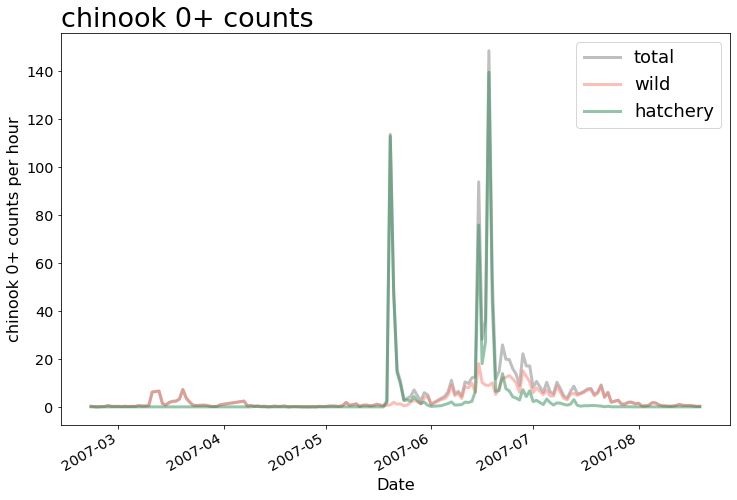

In [329]:
#chinook0
plot_fish_perhour(groupedby_dates_year,"chinook","0",["total","wild","hatchery"])

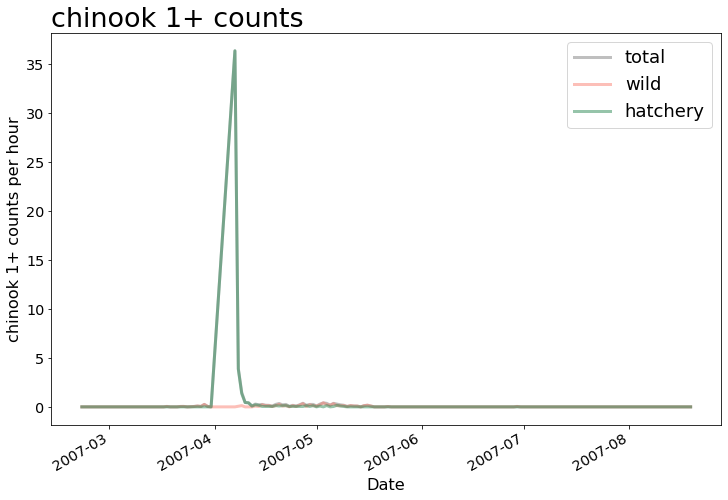

In [330]:
#chinook1
plot_fish_perhour(groupedby_dates_year,"chinook","1",["total","wild","hatchery"])

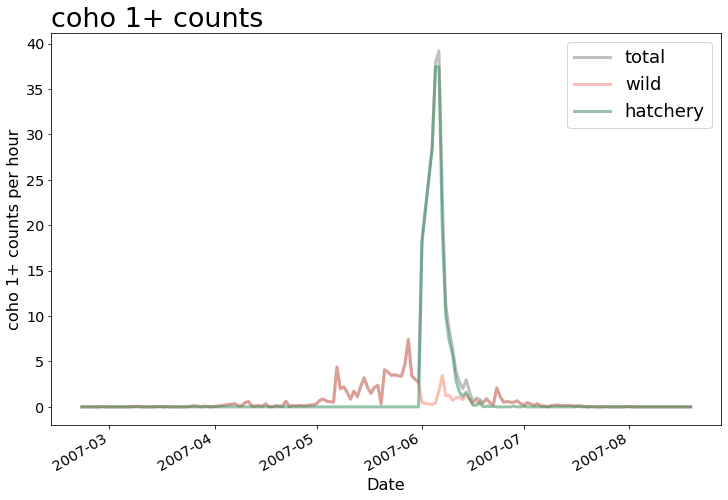

In [212]:
#Coho1

plot_fish_perhour(
    groupedby_dates_year,"coho","1",["total","wild","hatchery"])



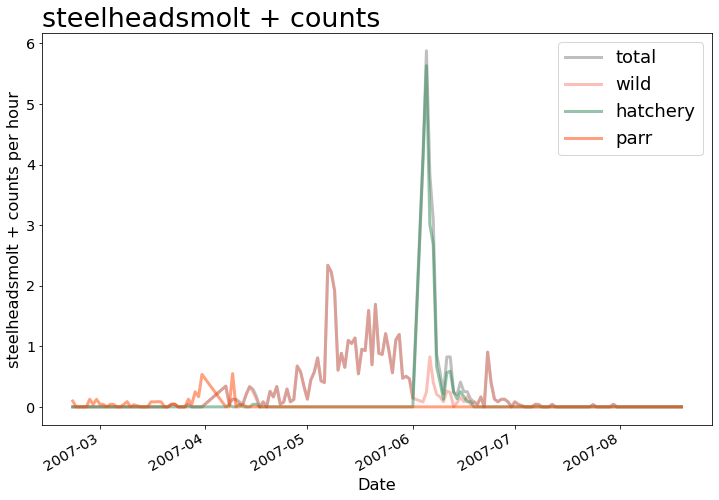

In [225]:
#Coho1

plot_fish_perhour(
    groupedby_dates_year,"steelheadsmolt","",["total","wild","hatchery","parr"])



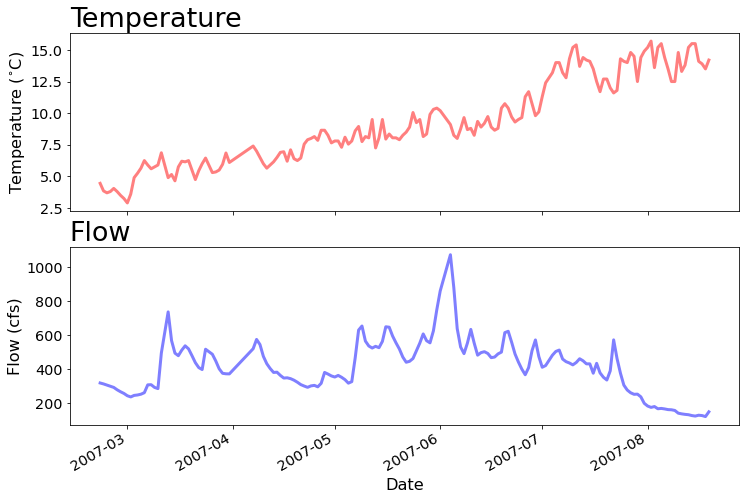

In [331]:
#plot temperature and flow
fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
ax1.plot(
    groupedby_dates_year.index, groupedby_dates_year['temp'], color = 'red', 
    label = 'temperature', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Temperature '+ r'($^{\circ}$C)', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Temperature', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')


#flow
ax2 = fig.add_subplot(212)
ax2.plot(
    groupedby_dates_year.index, groupedby_dates_year['flow'], color = 'blue', 
    label = 'flow', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Flow (cfs)', size = 0.9*fs)
ax2.tick_params(labelsize=.8*fs)
ax2.set_title('Flow', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()

In [332]:
groupedby_dates_year.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2007_dungeness.csv")  
df_year_temp_flow = df_year_temp_flow[df_year_temp_flow['Out'] == 0]
df_year_temp_flow.fillna(0, inplace=True)
df_year_temp_flow.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2007_dungeness_all.csv")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year_temp_flow)

,Date,Down_time,Up_date,Up_time,In,Out,Chinook0_Total,Chinook0_Hat,Chinook0_Wild,Chinook1_Total,Chinook1_Hat,Chinook1_Wild,Coho1_Total,Coho1_Wild,Coho1_Wild2,Coho1_Hat,Steelhead1_Total,Steelhead1_Wild,Steelhead1_Wild1,Steelhead1_Wild2,Steelhead1_Hat,Coho0,Chum,Pink,Sockeye,Trout Parr_Wild_Total,Trout Parr_Wild_Steelhead,Trout Parr_Wild_Cutthroat,Cutthroat_Wild_Smolt,Cutthroat_Wild_Adult,Dolly\Bull_Wild_Smolt,Up,Down,midpoint,date_x,time_x,temp,quality_x,date_y,time_y,flow,quality_y
0,2007-02-21,10:42:00,2007-02-21,17:30:00,6.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-02-21 17:30:00,2007-02-21 10:42:00,2007-02-21 14:06:00,02/21/2007,14:00,5.1,140,02/21/2007,14:00,318.0,1
1,2007-02-21,17:30:00,2007-02-22,07:30:00,14.000000,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2007-02-22 07:30:00,2007-02-21 17:30:00,2007-02-22 00:30:00,02/22/2007,00:30,3.8,140,02/22/2007,00:30,319.0,1
2,2007-02-22,07:30:00,2007-02-22,18:34:00,11.066667,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-02-22 18:34:00,2007-02-22 07:30:00,2007-02-22 13:02:00,02/22/2007,13:00,4.5,140,02/22/2007,13:00,314.0,1
3,2007-02-22,18:34:00,2007-02-23,08:20:00,13.766667,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2007-02-23 08:20:00,2007-02-22 18:34:00,2007-02-23 01:27:00,02/23/2007,01:15,3.2,140,02/23/2007,01:15,312.0,1
4,2007-02-23,08:20:00,2007-02-23,18:52:00,10.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-02-23 18:52:00,2007-02-23 08:20:00,2007-02-23 13:36:00,02/23/2007,13:30,4.1,140,02/23/2007,13:30,307.0,1
5,2007-02-23,18:52:00,2007-02-24,07:02:00,12.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2007-02-24 07:02:00,2007-02-23 18:52:00,2007-02-24 00:57:00,02/24/2007,00:45,3.3,140,02/24/2007,00:45,305.0,1
6,2007-02-24,07:02:00,2007-02-24,18:30:00,11.466667,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-02-24 18:30:00,2007-02-24 07:02:00,2007-02-24 12:46:00,02/24/2007,12:45,3.9,140,02/24/2007,12:45,300.0,1
7,2007-02-24,18:30:00,2007-02-25,07:06:00,12.600000,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2007-02-25 07:06:00,2007-02-24 18:30:00,2007-02-25 00:48:00,02/25/2007,00:45,3.7,140,02/25/2007,00:45,298.0,1
8,2007-02-25,07:06:00,2007-02-25,17:16:00,10.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-02-25 17:16:00,2007-02-25 07:06:00,2007-02-25 12:11:00,02/25/2007,12:00,4.3,140,02/25/2007,12:00,296.0,1
9,2007-02-25,17:16:00,2007-02-26,07:32:00,14.266667,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2007-02-26 07:32:00,2007-02-25 17:16:00,2007-02-26 00:24:00,02/26/2007,00:15,3.8,140,02/26/2007,00:15,289.0,1


In [333]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_dates_year)

,In,Out,Chinook0_Total,Chinook0_Hat,Chinook0_Wild,Chinook1_Total,Chinook1_Hat,Chinook1_Wild,Coho1_Total,Coho1_Wild,Coho1_Wild2,Coho1_Hat,Coho0,Chum,Pink,Sockeye,Steelhead1_Total,Steelhead1_Wild,Steelhead1_Wild1,Steelhead1_Wild2,Steelhead1_Hat,Cutthroat_Wild_Smolt,Cutthroat_Wild_Adult,Dolly\Bull_Wild_Smolt,Trout Parr_Wild_Total,Trout Parr_Wild_Steelhead,Trout Parr_Wild_Cutthroat,temp,flow,chinook0_perhour,chinook0_hatchery_perhour,chinook0_wild_perhour,chinook1_perhour,chinook1_hatchery_perhour,chinook1_wild_perhour,coho1_perhour,coho1_hatchery_perhour,coho1_wild_perhour,steelheadsmolt_perhour,steelheadsmolt_hatchery_perhour,steelheadsmolt_wild_perhour,steelheadsmolt_parr_perhour
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-02-21,20.800000,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,4.450000,318.500000,0.240385,0.000000,0.240385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096154
2007-02-22,24.833333,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.850000,313.000000,0.080537,0.000000,0.080537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-02-23,22.700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.700000,306.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-02-24,24.066667,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.800000,299.000000,0.124654,0.000000,0.124654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-02-25,24.433333,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.050000,292.500000,0.122783,0.000000,0.122783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-02-26,23.750000,0.0,14.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,3.800000,278.500000,0.589474,0.000000,0.589474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.126316
2007-02-27,24.550000,0.0,5.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.500000,267.000000,0.203666,0.000000,0.203666,0.000000,0.000000,0.000000,0.040733,0.000000,0.040733,0.000000,0.000000,0.000000,0.040733
2007-02-28,23.900000,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,3.250000,257.000000,0.209205,0.000000,0.209205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125523
2007-03-01,23.516667,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.900000,243.500000,0.212615,0.000000,0.212615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042523


In [321]:
df_midpoint = df_year_temp_flow.set_index('midpoint')

groupedby_time_year = df_midpoint.groupby(df_midpoint.index.floor('60T').time).sum()
# print(df_midpoint)

groupedby_time_year_subset = groupedby_time_year[['Chinook0_Hat',
                    'Chinook0_Wild',
                    'Chinook1_Hat',
                    'Chinook1_Wild',
                    'Coho1_Wild',
                    'Coho1_Wild2',
                    'Coho1_Hat',
                    'Steelhead1_Hat',
                    'Steelhead1_Wild',
                    'Steelhead1_Wild1',
                    'Steelhead1_Wild2',
                    'Trout Parr_Wild_Steelhead']].div(groupedby_time_year['In'],axis = 0)

groupedby_time_year_subset['Chinook0_Hat_prop'] = groupedby_time_year_subset['Chinook0_Hat']/groupedby_time_year_subset['Chinook0_Hat'].sum()

groupedby_time_year_subset['Chinook0_Wild_prop'] = groupedby_time_year_subset['Chinook0_Wild']/groupedby_time_year_subset['Chinook0_Wild'].sum()

groupedby_time_year_subset['Chinook1_Hat_prop'] = groupedby_time_year_subset['Chinook1_Hat']/groupedby_time_year_subset['Chinook1_Hat'].sum()

groupedby_time_year_subset['Chinook1_Wild_prop'] = groupedby_time_year_subset['Chinook1_Wild']/groupedby_time_year_subset['Chinook1_Wild'].sum()

groupedby_time_year_subset['Coho1_Hat_prop'] = groupedby_time_year_subset['Coho1_Hat']/groupedby_time_year_subset['Coho1_Hat'].sum()

groupedby_time_year_subset['Coho1_Wild_all'] = groupedby_time_year_subset['Coho1_Wild']+groupedby_time_year_subset['Coho1_Wild2']

groupedby_time_year_subset['Coho1_Wild_prop'] = groupedby_time_year_subset['Coho1_Wild_all']/groupedby_time_year_subset['Coho1_Wild_all'].sum()

groupedby_time_year_subset['Steelhead1_Wild_all'] = groupedby_time_year_subset['Steelhead1_Wild']+groupedby_time_year_subset['Steelhead1_Wild1']+groupedby_time_year_subset['Steelhead1_Wild2']

groupedby_time_year_subset['Steelhead1_Wild_prop'] = groupedby_time_year_subset['Steelhead1_Wild_all']/groupedby_time_year_subset['Steelhead1_Wild_all'].sum()

groupedby_time_year_subset['Steelhead1_Hat_prop'] = groupedby_time_year_subset['Steelhead1_Hat']/groupedby_time_year_subset['Steelhead1_Hat'].sum()

groupedby_time_year_subset['Steelhead1_Parr_prop'] = groupedby_time_year_subset['Trout Parr_Wild_Steelhead']/groupedby_time_year_subset['Trout Parr_Wild_Steelhead'].sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_time_year_subset)

,Chinook0_Hat,Chinook0_Wild,Chinook1_Hat,Chinook1_Wild,Coho1_Wild,Coho1_Wild2,Coho1_Hat,Steelhead1_Hat,Steelhead1_Wild,Steelhead1_Wild1,Steelhead1_Wild2,Trout Parr_Wild_Steelhead,Chinook0_Hat_prop,Chinook0_Wild_prop,Chinook1_Hat_prop,Chinook1_Wild_prop,Coho1_Hat_prop,Coho1_Wild_all,Coho1_Wild_prop,Steelhead1_Wild_all,Steelhead1_Wild_prop,Steelhead1_Hat_prop,Steelhead1_Parr_prop
00:00:00,0.000000,0.904371,0.110534,0.050243,0.023447,0.288059,0.000000,0.000000,0.023447,0.000000,0.204321,0.090437,0.000000,0.010007,0.023457,0.134421,0.000000,0.311506,0.023344,0.227768,0.076617,0.000000,0.099238
01:00:00,4.824289,3.071147,0.068559,0.138516,0.332999,1.372572,0.619826,0.097941,0.118928,0.000000,0.552667,0.030781,0.024117,0.033984,0.014549,0.370590,0.007513,1.705571,0.127816,0.671595,0.225914,0.010462,0.033777
02:00:00,17.368635,8.401901,0.171079,0.032587,0.130346,2.262050,1.849287,0.168364,0.057026,0.002716,0.695180,0.035302,0.086829,0.092973,0.036306,0.087183,0.022415,2.392396,0.179287,0.754922,0.253943,0.017985,0.038737
03:00:00,36.019108,5.744427,0.000000,0.000000,0.358280,0.752389,27.062102,2.507962,0.131369,0.000000,0.441879,0.000000,0.180066,0.063566,0.000000,0.000000,0.328019,1.110669,0.083234,0.573248,0.192831,0.267910,0.000000
04:00:00,0.249135,1.204152,2.532872,0.000000,0.000000,0.207612,18.062284,3.944637,0.000000,0.000000,0.083045,0.041522,0.001245,0.013325,0.537523,0.000000,0.218932,0.207612,0.015559,0.083045,0.027935,0.421381,0.045563
05:00:00,0.000000,3.931624,0.000000,0.000000,0.000000,0.170940,0.000000,0.000000,0.000000,0.000000,0.000000,0.683761,0.000000,0.043506,0.000000,0.000000,0.000000,0.170940,0.012810,0.000000,0.000000,0.000000,0.750298
06:00:00,108.329177,22.369077,0.000000,0.000000,0.000000,0.897756,1.346633,0.299252,0.000000,0.000000,0.224439,0.000000,0.541556,0.247529,0.000000,0.000000,0.016322,0.897756,0.067278,0.224439,0.075498,0.031967,0.000000
11:00:00,0.317881,2.781457,0.000000,0.000000,0.000000,0.000000,11.125828,0.238411,0.000000,0.000000,0.000000,0.000000,0.001589,0.030779,0.000000,0.000000,0.134856,0.000000,0.000000,0.000000,0.000000,0.025468,0.000000
12:00:00,0.043126,0.156822,0.007841,0.003921,0.000000,0.011762,1.705436,0.000000,0.000000,0.000000,0.000000,0.023523,0.000216,0.001735,0.001664,0.010489,0.020672,0.011762,0.000881,0.000000,0.000000,0.000000,0.025812
13:00:00,0.071901,0.716015,0.007490,0.008988,0.002996,0.025465,0.005992,0.000000,0.001498,0.000000,0.007490,0.005992,0.000359,0.007923,0.001589,0.024046,0.000073,0.028461,0.002133,0.008988,0.003023,0.000000,0.006575


Text(0.0, 1.0, 'Chinook 0+')

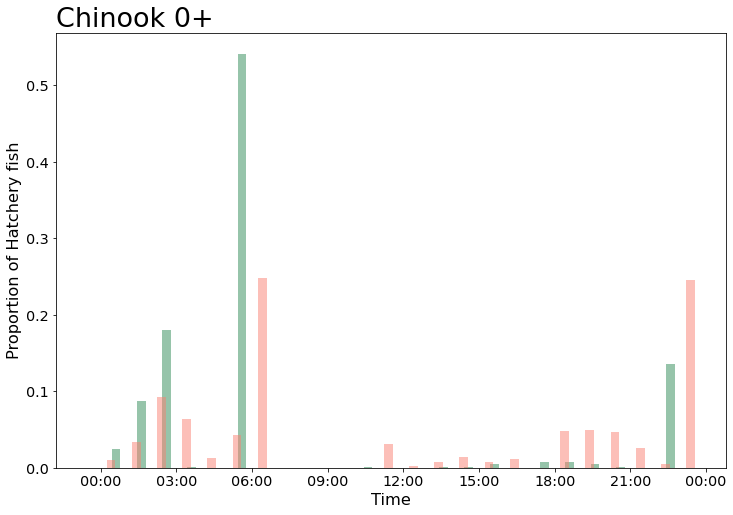

In [312]:
#bar plot Chinook0

fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
plt.bar(
    x_dt1, groupedby_time_year_subset['Chinook0_Hat_prop'], color = 'seagreen', 
    label = 'hatchery', alpha = 0.5, width=width_bar)
plt.bar(
    x_dt2, groupedby_time_year_subset['Chinook0_Wild_prop'], color = 'salmon', 
    label = 'hatchery', alpha = 0.5, width=width_bar)
# plt.gcf().autofmt_xdate()
plt.xlabel('Time', size = 0.9*fs)
plt.ylabel('Proportion of Hatchery fish', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax1.set_title('Chinook 0+', loc='left', fontsize = fs*1.5)

In [311]:
import datetime
my_day = datetime.date(2014, 7, 15)
x_dt = [ datetime.datetime.combine(my_day, t) for t in groupedby_time_year_subset.index ]
width_bar=(x_dt[1]-x_dt[0])*0.35
x_dt1 = [(t - (width_bar/2)) for t in x_dt]
x_dt2 = [(t + (width_bar/2)) for t in x_dt]
print(x_dt1)

[datetime.datetime(2014, 7, 14, 23, 36), datetime.datetime(2014, 7, 15, 0, 36), datetime.datetime(2014, 7, 15, 1, 36), datetime.datetime(2014, 7, 15, 2, 36), datetime.datetime(2014, 7, 15, 3, 36), datetime.datetime(2014, 7, 15, 4, 36), datetime.datetime(2014, 7, 15, 5, 36), datetime.datetime(2014, 7, 15, 6, 36), datetime.datetime(2014, 7, 15, 7, 36), datetime.datetime(2014, 7, 15, 10, 36), datetime.datetime(2014, 7, 15, 11, 36), datetime.datetime(2014, 7, 15, 12, 36), datetime.datetime(2014, 7, 15, 13, 36), datetime.datetime(2014, 7, 15, 14, 36), datetime.datetime(2014, 7, 15, 15, 36), datetime.datetime(2014, 7, 15, 17, 36), datetime.datetime(2014, 7, 15, 18, 36), datetime.datetime(2014, 7, 15, 19, 36), datetime.datetime(2014, 7, 15, 20, 36), datetime.datetime(2014, 7, 15, 21, 36), datetime.datetime(2014, 7, 15, 22, 36)]


In [322]:
groupedby_time_year_subset.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2007_dungeness_time.csv")  


In [1]:
import pandas as pd
year = "2007"
csv_name ="C:/Users/maria/OneDrive/Documents/data/pied_piper/"+str(year)+"_dungeness_all.csv"
df_year_temp_flow = pd.read_csv(csv_name, header=0) 
df_midpoint = df_year_temp_flow.set_index('midpoint')

groupedby_time_year = df_midpoint.groupby(pd.to_datetime(df_midpoint.index).floor('480T').time).sum()
# print(df_midpoint)
groupedby_time_year_subset = groupedby_time_year[['Chinook0_Hat',
                    'Chinook0_Wild',
                    'Chinook1_Hat',
                    'Chinook1_Wild',
                    'Coho1_Wild',
                    'Coho1_Wild2',
                    'Coho1_Hat',
                    'Steelhead1_Hat',
                    'Steelhead1_Wild',
                    'Steelhead1_Wild1',
                    'Steelhead1_Wild2',
                    'Trout Parr_Wild_Steelhead']].div(groupedby_time_year['In'],axis = 0)

groupedby_time_year_subset['Chinook0_Hat_prop'] = groupedby_time_year_subset['Chinook0_Hat']/groupedby_time_year_subset['Chinook0_Hat'].sum()

groupedby_time_year_subset['Chinook0_Wild_prop'] = groupedby_time_year_subset['Chinook0_Wild']/groupedby_time_year_subset['Chinook0_Wild'].sum()

groupedby_time_year_subset['Chinook1_Hat_prop'] = groupedby_time_year_subset['Chinook1_Hat']/groupedby_time_year_subset['Chinook1_Hat'].sum()

groupedby_time_year_subset['Chinook1_Wild_prop'] = groupedby_time_year_subset['Chinook1_Wild']/groupedby_time_year_subset['Chinook1_Wild'].sum()

groupedby_time_year_subset['Coho1_Hat_prop'] = groupedby_time_year_subset['Coho1_Hat']/groupedby_time_year_subset['Coho1_Hat'].sum()

groupedby_time_year_subset['Coho1_Wild_all'] = groupedby_time_year_subset['Coho1_Wild']+groupedby_time_year_subset['Coho1_Wild2']

groupedby_time_year_subset['Coho1_Wild_prop'] = groupedby_time_year_subset['Coho1_Wild_all']/groupedby_time_year_subset['Coho1_Wild_all'].sum()

groupedby_time_year_subset['Steelhead1_Wild_all'] = groupedby_time_year_subset['Steelhead1_Wild']+groupedby_time_year_subset['Steelhead1_Wild1']+groupedby_time_year_subset['Steelhead1_Wild2']

groupedby_time_year_subset['Steelhead1_Wild_prop'] = groupedby_time_year_subset['Steelhead1_Wild_all']/groupedby_time_year_subset['Steelhead1_Wild_all'].sum()

groupedby_time_year_subset['Steelhead1_Hat_prop'] = groupedby_time_year_subset['Steelhead1_Hat']/groupedby_time_year_subset['Steelhead1_Hat'].sum()

groupedby_time_year_subset['Steelhead1_Parr_prop'] = groupedby_time_year_subset['Trout Parr_Wild_Steelhead']/groupedby_time_year_subset['Trout Parr_Wild_Steelhead'].sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_time_year_subset)

,Chinook0_Hat,Chinook0_Wild,Chinook1_Hat,Chinook1_Wild,Coho1_Wild,Coho1_Wild2,Coho1_Hat,Steelhead1_Hat,Steelhead1_Wild,Steelhead1_Wild1,Steelhead1_Wild2,Trout Parr_Wild_Steelhead,Chinook0_Hat_prop,Chinook0_Wild_prop,Chinook1_Hat_prop,Chinook1_Wild_prop,Coho1_Hat_prop,Coho1_Wild_all,Coho1_Wild_prop,Steelhead1_Wild_all,Steelhead1_Wild_prop,Steelhead1_Hat_prop,Steelhead1_Parr_prop
00:00:00,9.488582,4.236519,0.136555,0.083524,0.214113,1.313182,2.547479,0.292334,0.082198,0.000663,0.499818,0.044414,0.909545,0.495828,0.590335,0.893981,0.796103,1.527294,0.889244,0.582679,0.920302,0.953046,0.852955
08:00:00,0.106428,0.761073,0.015313,0.007657,0.004594,0.023736,0.515294,0.007657,0.001531,0.000766,0.009188,0.007657,0.010202,0.089074,0.066201,0.081952,0.161033,0.028330,0.016495,0.011485,0.018140,0.024962,0.147045
16:00:00,0.837216,3.546739,0.079449,0.002249,0.005247,0.156650,0.137163,0.006746,0.000000,0.000000,0.038975,0.000000,0.080253,0.415099,0.343464,0.024067,0.042864,0.161897,0.094262,0.038975,0.061559,0.021992,0.000000


In [2]:
groupedby_time_year_subset.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2007_dungeness_time_daylight.csv")  
